# *_2024 F1 Season Data_*

In [8]:
#imports 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

**SECTION 1: DICTIONARIES**

In [15]:
#points dictionary - place:pts
points = {1:25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10:1,
          11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0,  0:0}

racelist = ['Bahrain', 'Saudi Arabia'] #'Australia','Japan', 'China', 'Miami', 'Emilia-Romagna','Monaco', 'Canada', 'Spain', 'Austria', 'Britain', 'Hungary', 'Belgium','Netherlands', 'Monza', 'Azerbaijan', 'Singapore', 'Cota', 'Mexico','Brazil', 'Vegas', 'Qatar', 'Abu Dhabi']

#driversdict

#O represents DNF/DNE 
drivers = {
    'VER': {'Race': racelist, 
        'Quali Pos.':[1,1], 
        'Race Finish Pos.': [1,1]},
    
    'PER': {'Race': racelist,
        'Quali Pos.':[5,3], 
        'Race Finish Pos.': [2,2]},
    
    'LEC': {'Race': racelist,
        'Quali Pos.' :[2,2], 
        'Race Finish Pos.': [4,3]},

    'SAI': {'Race': racelist,
        'Quali Pos.':[4, 0 #DNS
                     ], 
        'Race Finish Pos.': [3, 0 #DNS
                            ]},

    'RUS': {'Race': racelist,
        'Quali Pos.':[3,7], 
        'Race Finish Pos.': [5,6]},

    'HAM': {'Race': racelist,
        'Quali Pos.':[9,8], 
        'Race Finish Pos.': [7,9]},
    
    'ALO': {'Race': racelist,
        'Quali Pos.':[6,4], 
        'Race Finish Pos.': [9,5]},

    'STR': {'Race': racelist,
        'Quali Pos.':[12,10], 
        'Race Finish Pos.': [10, 0 #DNF 
                            ]},
    
    'NOR': {'Race': racelist,
        'Quali Pos.':[7,6], 
        'Race Finish Pos.': [6,8]},

    'PIA': {'Race': racelist,
        'Quali Pos.':[8,5], 
        'Race Finish Pos.': [8,4]},

    'HUL': {'Race': racelist,
        'Quali Pos.':[10,15], 
        'Race Finish Pos.': [16,10]},

    'MAG': {'Race': racelist,
        'Quali Pos.':[15,13], 
        'Race Finish Pos.': [12,12]},

    'TSU': {'Race': racelist,
        'Quali Pos.':[11,9], 
        'Race Finish Pos.': [14,15]},

    'RIC': {'Race': racelist,
        'Quali Pos.':[14,14], 
        'Race Finish Pos.': [13,16]},

    'ALB': {'Race': racelist,
        'Quali Pos.':[13,12], 
        'Race Finish Pos.': [15,11]},

    'SAR': {'Race': racelist,
        'Quali Pos.':[18,19], 
        'Race Finish Pos.': [20,14]},

    'BOT': {'Race': racelist,
        'Quali Pos.':[16,16], 
        'Race Finish Pos.': [19,17]},

    'ZHO': {'Race': racelist,
        'Quali Pos.':[17,20], 
        'Race Finish Pos.': [11,18]},

    'OCO': {'Race': racelist,
        'Quali Pos.':[19,17], 
        'Race Finish Pos.': [17,13]},

    'GAS': {'Race': racelist,
        'Quali Pos.':[20,18], 
        'Race Finish Pos.': [18, 0 #DNF 
                            ]}
}

#Add Net Change  
for driver, data in drivers.items():
    quali_pos = data['Quali Pos.']
    race_finish_pos = data['Race Finish Pos.']
    net_change = [finish - quali for quali, finish in zip(quali_pos, race_finish_pos)]
    data['Net Race Pos. Change'] = net_change

#Add Points Per Race 
for driver, data in drivers.items():
    race_finish_positions = data['Race Finish Pos.']
    points_list = [points[pos] for pos in race_finish_positions]
    data['Points'] = points_list

#Add Cumulative Points 
for driver, data in drivers.items():
    race_finish_positions = data['Race Finish Pos.']
    cumulative_points = []
    total_points = 0
    for pos in race_finish_positions:
        total_points += points.get(pos, 0)  # Get points for the position, default to 0 if not found
        cumulative_points.append(total_points)
    data['Cumulative Points'] = cumulative_points


#Head2Head 
Redbull = {key: value for key, value in drivers.items() if key in ['VER', 'PER']}
Ferrari = {key: value for key, value in drivers.items() if key in ['LEC', 'SAI']}
Merc = {key: value for key, value in drivers.items() if key in ['RUS', 'HAM']}
Mclaren = {key: value for key, value in drivers.items() if key in ['NOR', 'PIA']}
Aston = {key: value for key, value in drivers.items() if key in ['ALO', 'STR']}
Stake = {key: value for key, value in drivers.items() if key in ['BOT', 'ZHO']}
Haas = {key: value for key, value in drivers.items() if key in ['HUL', 'MAG']}
VisaRB = {key: value for key, value in drivers.items() if key in ['TSU', 'RIC']}
Williams = {key: value for key, value in drivers.items() if key in ['ALB','SAR']}
Alpine = {key: value for key, value in drivers.items() if key in ['GAS', 'OCO']}



h2h_list = [Redbull, Ferrari, Merc, Mclaren, Aston, Stake, Haas, VisaRB, Williams, Alpine]

team_data = {
    'RedBull': 
    {'Race': [racelist], 'Pos. in Championship': [1, 1,0]},
    'Ferrari': 
    {'Race': [racelist], 'Pos. in Championship': [2, 2,0]},
    'Merc': 
    {'Race':[racelist], 'Pos. in Championship': [3, 4,0]},
    'Mclaren':
    {'Race': [racelist], 'Pos. in Championship': [4, 3,0]},
    'Aston': 
    {'Race':[racelist], 'Pos. in Championship': [5, 5,0]},
    'Stake': 
    {'Race': [racelist], 'Pos. in Championship': [6, 8,0]},
    'Haas':
    {'Race': [racelist], 'Pos. in Championship': [7, 6,0]},
    'VisaRB': 
    {'Race': [racelist], 'Pos. in Championship': [8, 9,0]},
    'Williams': 
    {'Race': [racelist], 'Pos. in Championship': [9, 7,0]},
    'Alpine': 
    {'Race': [racelist], 'Pos. in Championship': [10, 10,0]}}



In [16]:
drivers

{'VER': {'Race': ['Bahrain', 'Saudi Arabia'],
  'Quali Pos.': [1, 1],
  'Race Finish Pos.': [1, 1],
  'Net Race Pos. Change': [0, 0],
  'Points': [25, 25],
  'Cumulative Points': [25, 50]},
 'PER': {'Race': ['Bahrain', 'Saudi Arabia'],
  'Quali Pos.': [5, 3],
  'Race Finish Pos.': [2, 2],
  'Net Race Pos. Change': [-3, -1],
  'Points': [18, 18],
  'Cumulative Points': [18, 36]},
 'LEC': {'Race': ['Bahrain', 'Saudi Arabia'],
  'Quali Pos.': [2, 2],
  'Race Finish Pos.': [4, 3],
  'Net Race Pos. Change': [2, 1],
  'Points': [12, 15],
  'Cumulative Points': [12, 27]},
 'SAI': {'Race': ['Bahrain', 'Saudi Arabia'],
  'Quali Pos.': [4, 0],
  'Race Finish Pos.': [3, 0],
  'Net Race Pos. Change': [-1, 0],
  'Points': [15, 0],
  'Cumulative Points': [15, 15]},
 'RUS': {'Race': ['Bahrain', 'Saudi Arabia'],
  'Quali Pos.': [3, 7],
  'Race Finish Pos.': [5, 6],
  'Net Race Pos. Change': [2, -1],
  'Points': [10, 8],
  'Cumulative Points': [10, 18]},
 'HAM': {'Race': ['Bahrain', 'Saudi Arabia'],
  

**SECTION 2: BASIC PLOTS**

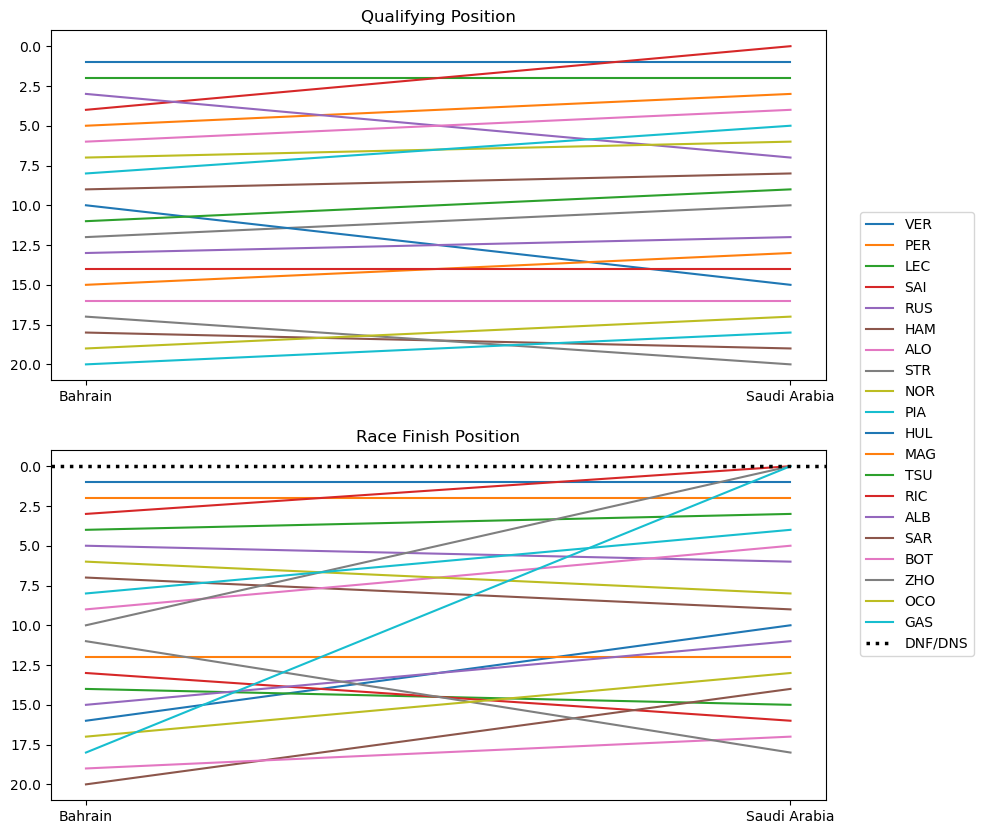

In [6]:
#Updating Driver Plot 
plt.figure(figsize=(10,10))

#Quali Plot 
for key in drivers:
    plt.subplot(2,1,1)
    plt.plot(racelist, drivers[key]['Quali Pos.'])
    plt.title('Qualifying Position')
plt.gca().invert_yaxis()     

#Race Finish Plot
legend = []
for key in drivers:             
    plt.subplot(2,1,2)
    plt.plot(racelist, drivers[key]['Race Finish Pos.'])
    plt.title('Race Finish Position')
    legend.append(key)
legend.append('DNF/DNS')
plt.axhline(y = 0 , linestyle = 'dotted', color = 'Black',linewidth = 2.5)
plt.legend(legend, fontsize='medium', bbox_to_anchor=(1.2, 1.7), loc='upper right')
plt.gca().invert_yaxis() 

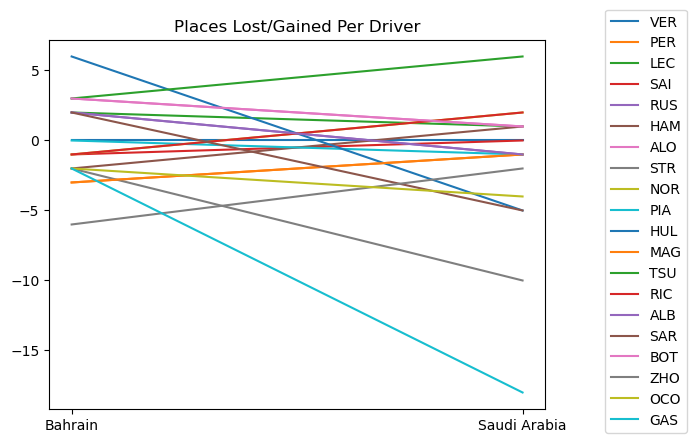

In [7]:
#Graph for Net Change 
legend = []
for key in drivers:
    plt.plot(racelist, drivers[key]['Net Race Pos. Change'])
    plt.title('Places Lost/Gained Per Driver')
    legend.append(key)
plt.legend(legend, fontsize='medium', bbox_to_anchor=(1.3, 1.1), loc='upper right')

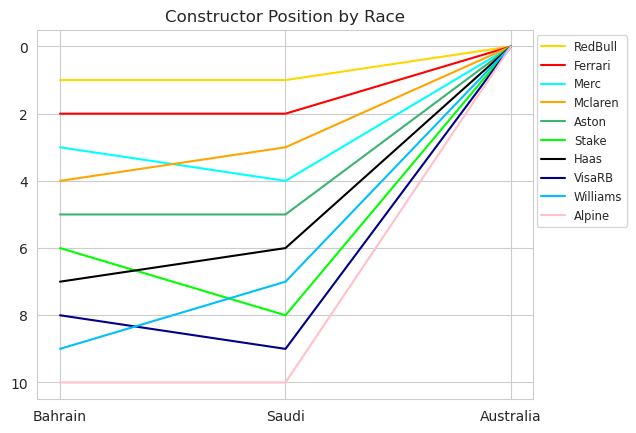

In [157]:
#Udpating Pos. Graph
team_colors = {
    'RedBull': 'gold','Ferrari': 'red','Merc': 'cyan', 'Mclaren': 'orange','Aston': 'mediumseagreen',
    'Stake': 'lime','Haas': 'black','VisaRB': 'darkblue','Williams': 'deepskyblue','Alpine': 'pink'
}

sns.set_style("whitegrid")

for team, data in team_data.items():
    plt.plot(data['Race'], data['Pos. in Championship'], color=team_colors[team])

plt.gca().invert_yaxis()
plt.legend(team_data.keys(), fontsize='small', bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('Constructor Position by Race')
plt.show()

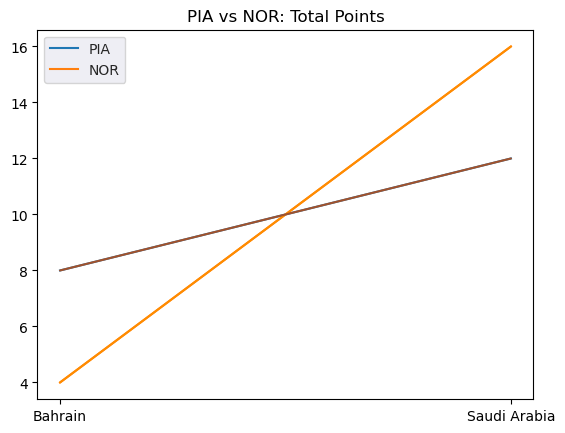

In [21]:
#Updating Teammate Graphs 
for key in Mclaren:
    plt.plot(racelist,drivers[key]['Cumulative Points'])

#Mclaren 
#ns.set_style("darkgrid")
#plt.plot(racelist, drivers['PIA']['Cumulative Points'], 'darkorange')
#plt.plot(racelist, drivers['NOR']['Cumulative Points'], 'sienna')
plt.title('PIA vs NOR: Total Points')

legend = ['PIA','NOR']
plt.legend(legend)

In [ ]:
#make graph for changing point differnce within teams!

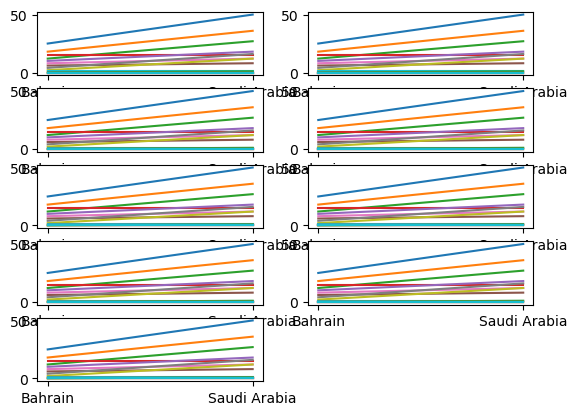

{'Race': ['Bahrain', 'Saudi Arabia'],
 'Quali Pos.': [2, 2],
 'Race Finish Pos.': [4, 3],
 'Net Race Pos. Change': [2, 1],
 'Points': [12, 15],
 'Cumulative Points': [12, 27]}